In [1]:
import json
import pandas as pd
#import requests
#from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np

from geonamescache import GeonamesCache
from geotext import GeoText
import re
import pycountry

In [2]:
df = pd.read_csv("download/SIGCOMMNamesFinal.csv")
df

,name,year,committee,region,cleanedName,cleanedRegion,Continent,DirectMatch,FuzzyMatch,ApproximateDoctoralGradYear,Gender,Source
0,Pablo Rodriguez,2009,Organizing,"Telefonica Research, Spain",Pablo Rodriguez,"Telefonica Research, Spain",Europe,NaN,Male,2000,Male,FuzzyMatch
1,Ernst Biersack,2009,Organizing,"Eurecom, France",Ernst Biersack,"Eurecom, France",Europe,NaN,Male,1988,Male,FuzzyMatch
2,Konstantina Papagiannaki,2009,Organizing,"Intel Labs Pittsburgh, USA",Konstantina Papagiannaki,"Intel Labs Pittsburgh, USA",North America,NaN,Female,2003,Female,FuzzyMatch
3,Luigi Rizzo,2009,Organizing,"Universit� di Pisa, Italy",Luigi Rizzo,"Universit di Pisa, Italy",Europe,Male,Male,1998,Male,FullNameMatch
4,Christophe Diot,2009,Organizing,"Thomson, France",Christophe Diot,"Thomson, France",Europe,Male,Male,1991,Male,FullNameMatch
...,...,...,...,...,...,...,...,...,...,...,...,...
1225,Yiting Xia,2023,Program,Max Planck Institute for Informatics,Yiting Xia,Max Planck Institute for Informatics,Europe,Female,Female,2018,Female,FullNameMatch
1226,Yiying Zhang,2023,Program,"University of California, San Diego",Yiying Zhang,"University of California, San Diego",North America,Female,Female,2019,Female,FullNameMatch
1227,Yu Hua,2023,Program,Huazhong University of Science and Technology,Yu Hua,Huazhong University of Science and Technology,Asia,Male,Male,2005,Male,FullNameMatch
1228,Yunxin Liu,2023,Program,"Institute for AI Industry Research (AIR), Tsin...",Yunxin Liu,"Institute for AI Industry Research (AIR), Tsin...",Asia,Male,Male,2011,Male,FullNameMatch


In [3]:
df0 = df[['committee','cleanedName','year','cleanedRegion','Continent','Gender','ApproximateDoctoralGradYear']]
df0

,committee,cleanedName,year,cleanedRegion,Continent,Gender,ApproximateDoctoralGradYear
0,Organizing,Pablo Rodriguez,2009,"Telefonica Research, Spain",Europe,Male,2000
1,Organizing,Ernst Biersack,2009,"Eurecom, France",Europe,Male,1988
2,Organizing,Konstantina Papagiannaki,2009,"Intel Labs Pittsburgh, USA",North America,Female,2003
3,Organizing,Luigi Rizzo,2009,"Universit di Pisa, Italy",Europe,Male,1998
4,Organizing,Christophe Diot,2009,"Thomson, France",Europe,Male,1991
...,...,...,...,...,...,...,...
1225,Program,Yiting Xia,2023,Max Planck Institute for Informatics,Europe,Female,2018
1226,Program,Yiying Zhang,2023,"University of California, San Diego",North America,Female,2019
1227,Program,Yu Hua,2023,Huazhong University of Science and Technology,Asia,Male,2005
1228,Program,Yunxin Liu,2023,"Institute for AI Industry Research (AIR), Tsin...",Asia,Male,2011


In [4]:
df_o = df0[df0['committee'] == 'Organizing']
df_p = df0[df0['committee'] == 'Program']

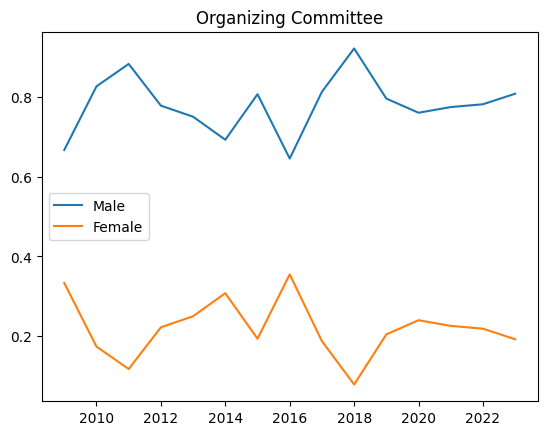

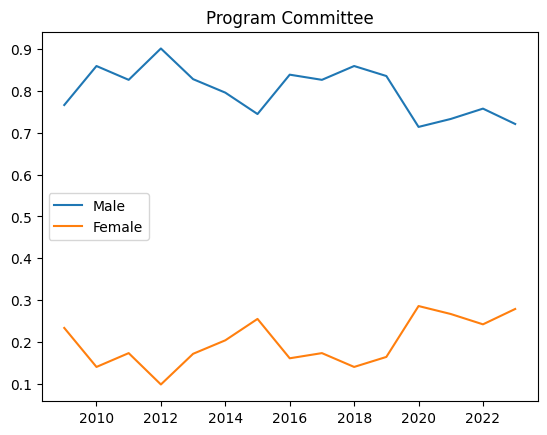

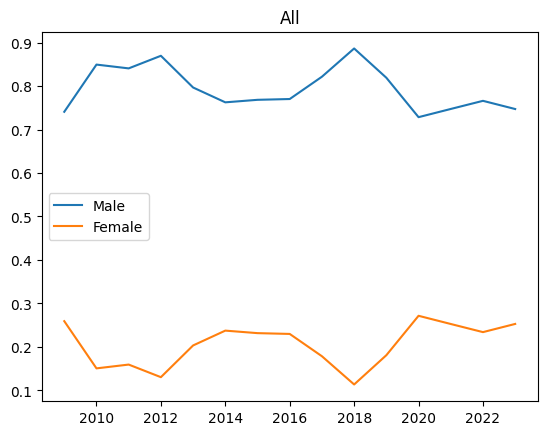

In [5]:
i=0
title = ['Organizing Committee', 'Program Committee', 'All']
for df1 in [df_o, df_p, df0]:
    y = np.arange(2009,2024)
    m_rate = []
    f_rate = []
    for year in range(2009,2024):
        all_count = len(df1[df1['year']==year])
        m = len(df1[(df1['year']==year) & (df1['Gender']=='Male') ])
        m_rate.append(m/all_count)
        f_rate.append(1-m/all_count)

    plt.plot(y,m_rate, label = 'Male')
    plt.plot(y,f_rate, label = 'Female')

    plt.legend(loc="center left")
    plt.title(title[i])
    i += 1
    plt.show()

In [6]:
continents = df0['Continent'].unique()

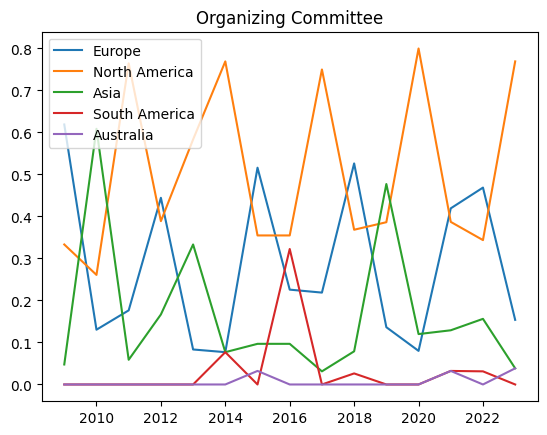

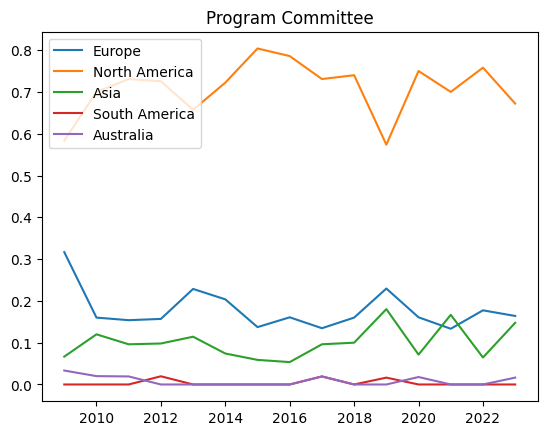

In [7]:
i=0
title = ['Organizing Committee', 'Program Committee']
for df1 in [df_o, df_p]:
    y = np.arange(2009,2024)
    for c in continents:
        c_rate = []
        for year in range(2009,2024):
            all_count = len(df1[df1['year']==year])
            c_count = len(df1[(df1['year']==year) & (df1['Continent']==c) ])
            c_rate.append(c_count/all_count)
            
        plt.plot(y, c_rate, label = c)
            

    plt.legend(loc="upper left")
    plt.title(title[i])
    i += 1
    plt.show()

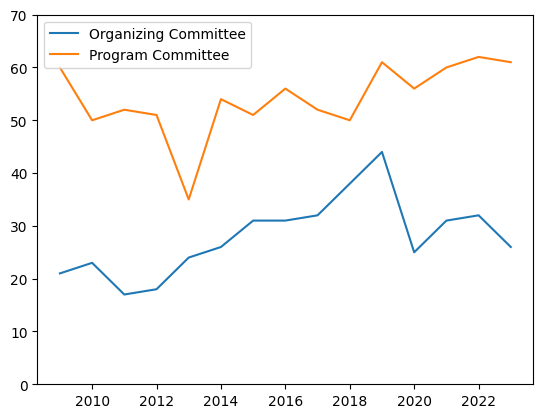

In [8]:
i=0
title = ['Organizing Committee', 'Program Committee']
for df1 in [df_o, df_p]:
    y = np.arange(2009,2024)
    count = []
    for year in range(2009,2024):
        all_count = len(df1[df1['year']==year])
        count.append(all_count)

    plt.plot(y,count, label = title[i])
    plt.ylim(0,70)

    plt.legend(loc="upper left")
    #plt.title(title[i])
    i += 1
plt.show()

In [9]:
#df0['cleanedRegion'].unique()

In [10]:
def get_country(row):
    
    #print(row)
    name = row['cleanedName']
    place = row['cleanedRegion']
    
    # Mapping of location abbreviations to country names
    location_mappings = {
        'NUS': 'Singapore',
        'Columbia|US|USA|Harvard|Stanford|George Washington|Irvine|West Point|Connecticut|Princeton|Purdue|Minnesota|Austin|San Diego|Pennsylvania|NYU|Chicago|Virginia|MIT|Georgia|Duke|Northeastern|California|Northwestern|Massachusetts|Carnegie|UCLA|CMU|Stony Brook|Wisconsin|Wisconsin-Madison|Rice|Colorado|Rutgers|Illinois|Boston|Florida|New York|Maryland|Michigan|Yale|Washington|Texas|Carolina|UC|Cornell|Brown|Oregon|USC|UCSB|Amherst|UIUC|Johns Hopkins|UWM|UWisc|Brown|UMich|UMass|Redmond|ICSI|Memphis|Tufts': 'United States',
        'UK|London|Cambridge|Oxford|Southampton': 'United Kingdom',
        'Karlstad|KTH': 'Sweden',
        'Hong Kong|Chiao|Huazhong|Tsinghua|Fudan|Peking|HKUST|NTU|Taiwan|Alibaba': 'China',
        'EPFL|Zurich|Svizzera|ETHZ': 'Switzerland',
        'MPI-SWS|Planck|Munich|Brandenburg|Technische|Potsdam|MPI|Goettingen': 'Germany',
        'Delft|Amsterdam|Twente': 'Netherlands',
        'Jerusalem|Reichman': 'Israel',
        # 'KAIST|Korea': 'South Korea',
        'KAIST|Korea':'Korea, Republic of',
        'UNSW|Melbourne|Adelaide': 'Australia',
        'Toronto|Waterloo': 'Canada',
        'Budapest': 'Hungary',
        'Abdullah': 'South Arabia',
        'IMDEA|Carlos III Madrid': 'Spain',
        'Linz|AIT|Austrian': 'Austria',
        'Campinas|Passo Fundo': 'Brazil',
        'Lisbon': 'Portugal',
        'IIT': 'India',
        'UCLouvain|Louvain': 'Belgium',
        'Lahore|LUMS': 'Pakistan',
        'Waikato': 'New Zealand',
        'Bucharest': 'Romania',
        'Inria': 'France',
        'IIJ|NII': 'Japan',
        'KAUST': 'Saudi Arabia',
        'Tallinn': 'Estonia',
        'Russia': 'Russian Federation',
        'Crete': 'Greece'
    }
    # Wording manipulations to extract mappings
    for abbreviation, full_name in location_mappings.items():
        abbreviation_list = re.split(r'\||\s+', abbreviation)
        abbreviation_regex = r'\b({})\b'.format('|'.join(re.escape(abbr) for abbr in abbreviation_list))
        place = re.sub(abbreviation_regex, full_name, place, flags=re.IGNORECASE)

    #print(place)
    # Extract country from the place name
    countries = []
    for country in pycountry.countries:
        if str(country.name).lower() in str(place).lower():
            countries.append(country.name)
    
    people_mapping = {
        'Stefan Saroiu': 'United States',
        'David Maltz': 'United States',
        'Chuanxiong Guo': 'China',
        'Kun Tan': 'China',
        'Ranveer Chandra': 'United States',
        'Monia Ghobadi': 'United States',
        'Ratul Mahajan': 'United States',
        'Hitesh Ballani': 'United Kingdom',
        'Srikanth Kandula': 'United States',
        'Thomas Karagiannis': 'United Kingdom',
        'Chieh-Jan Mike Liang': 'China',
        'Amar Phanishayee': 'United States',
        'Ganesh Ananthanarayanan': 'United States',
        'Ryan Beckett': 'United States',
        'Paolo Costa': 'United Kingdom',
        'Behnaz Arzani': 'United States',
        'Venkat Padmanabhan': 'India',
        'Rachee Singh': 'United States',
        'Lars Eggert': 'Germany',
        'Walter Willinger': 'United States',
        'Radhika Niranjan Mysore': 'United States',
        'Sujata Banerjee': 'United States',
        'Jia Wang': 'United States',
        'Aditya Akella': 'United States',
        'Nandita Dukkipati': 'United States',
        'Danny Raz': 'Israel',
        'Zihui Ge': 'United States',
        'Changhoon Kim': 'United States',
        'Teemu Koponen': 'United States',
        'Nikolaos Laoutaris': 'Spain',
        'Pablo Rodriguez': 'Spain',
        'Ankit Singla': 'Switzerland',
        'Amin Vahdat': 'United States',
        'Laurent Vanbever': 'Switzerland',
        'David Wetherall': 'United States',
        'Yibo Zhu': 'United States',
        'Aman Shaikh': 'United States',
        'Hongqiang Liu': 'United States',
        'Nathan Bronson': 'United States',
        'James Hongyi Zeng': 'United States',
        'Marco Canini': 'Saudi Arabia',
        'Renata Teixeira': 'France',
        'David Oran': 'United States',
        'Nicholas Zhang': 'Bulgaria',
        'David Meyer': 'United States',
        'Puneet Sharma': 'United States',
        'Andra Lutu': 'Spain',
        'Italo Cunha': 'Brazil',
        'Simon Leinen': 'Switzerland',
        
    }
    
    if (len(countries)==0) and (name in people_mapping):
        countries.append(people_mapping[name])
    if (len(countries)==2):
        countries = [countries[-1]]
    if  len(countries)==0:
        for company in ['Facebook','Amazon','Google','VMware','AT&T','Netflix','Barefoot Networks']:
            if company in place:
                countries.append('United States')
                break

    
    
    
    
    
    return countries[0]
    




     


In [11]:
df0['country'] = df0.apply(get_country, axis=1)

df0



/tmp/ipykernel_8722/2379581066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['country'] = df0.apply(get_country, axis=1)


,committee,cleanedName,year,cleanedRegion,Continent,Gender,ApproximateDoctoralGradYear,country
0,Organizing,Pablo Rodriguez,2009,"Telefonica Research, Spain",Europe,Male,2000,Spain
1,Organizing,Ernst Biersack,2009,"Eurecom, France",Europe,Male,1988,France
2,Organizing,Konstantina Papagiannaki,2009,"Intel Labs Pittsburgh, USA",North America,Female,2003,United States
3,Organizing,Luigi Rizzo,2009,"Universit di Pisa, Italy",Europe,Male,1998,Italy
4,Organizing,Christophe Diot,2009,"Thomson, France",Europe,Male,1991,France
...,...,...,...,...,...,...,...,...
1225,Program,Yiting Xia,2023,Max Planck Institute for Informatics,Europe,Female,2018,Germany
1226,Program,Yiying Zhang,2023,"University of California, San Diego",North America,Female,2019,United States
1227,Program,Yu Hua,2023,Huazhong University of Science and Technology,Asia,Male,2005,China
1228,Program,Yunxin Liu,2023,"Institute for AI Industry Research (AIR), Tsin...",Asia,Male,2011,China


In [12]:
df0.to_csv('output_data/20230805_SIGCOMM_country')

In [2]:
df_c = pd.read_csv('output_data/20230805_SIGCOMM_country',index_col=0)
df_c

,committee,cleanedName,year,cleanedRegion,Continent,Gender,ApproximateDoctoralGradYear,country
0,Organizing,Pablo Rodriguez,2009,"Telefonica Research, Spain",Europe,Male,2000,Spain
1,Organizing,Ernst Biersack,2009,"Eurecom, France",Europe,Male,1988,France
2,Organizing,Konstantina Papagiannaki,2009,"Intel Labs Pittsburgh, USA",North America,Female,2003,United States
3,Organizing,Luigi Rizzo,2009,"Universit di Pisa, Italy",Europe,Male,1998,Italy
4,Organizing,Christophe Diot,2009,"Thomson, France",Europe,Male,1991,France
...,...,...,...,...,...,...,...,...
1225,Program,Yiting Xia,2023,Max Planck Institute for Informatics,Europe,Female,2018,Germany
1226,Program,Yiying Zhang,2023,"University of California, San Diego",North America,Female,2019,United States
1227,Program,Yu Hua,2023,Huazhong University of Science and Technology,Asia,Male,2005,China
1228,Program,Yunxin Liu,2023,"Institute for AI Industry Research (AIR), Tsin...",Asia,Male,2011,China


In [3]:
df_c['country_iso'] = df_c['country'].apply(lambda x: pycountry.countries.lookup(x).alpha_3)
df_c

,committee,cleanedName,year,cleanedRegion,Continent,Gender,ApproximateDoctoralGradYear,country,country_iso
0,Organizing,Pablo Rodriguez,2009,"Telefonica Research, Spain",Europe,Male,2000,Spain,ESP
1,Organizing,Ernst Biersack,2009,"Eurecom, France",Europe,Male,1988,France,FRA
2,Organizing,Konstantina Papagiannaki,2009,"Intel Labs Pittsburgh, USA",North America,Female,2003,United States,USA
3,Organizing,Luigi Rizzo,2009,"Universit di Pisa, Italy",Europe,Male,1998,Italy,ITA
4,Organizing,Christophe Diot,2009,"Thomson, France",Europe,Male,1991,France,FRA
...,...,...,...,...,...,...,...,...,...
1225,Program,Yiting Xia,2023,Max Planck Institute for Informatics,Europe,Female,2018,Germany,DEU
1226,Program,Yiying Zhang,2023,"University of California, San Diego",North America,Female,2019,United States,USA
1227,Program,Yu Hua,2023,Huazhong University of Science and Technology,Asia,Male,2005,China,CHN
1228,Program,Yunxin Liu,2023,"Institute for AI Industry Research (AIR), Tsin...",Asia,Male,2011,China,CHN


In [4]:
import plotly.express as px

df_test = df_c[(df_c['year']==2023) & (df_c['committee']=='Program')]
df_test_count = df_test.groupby(['country_iso','country'])['country_iso'].count()
df_test_count = df_test_count.to_frame().rename(columns={'country_iso': 'count'})
df_test_count = df_test_count.reset_index()
df_test_count

,country_iso,country,count
0,AUS,Australia,1
1,CAN,Canada,1
2,CHE,Switzerland,1
3,CHN,China,5
4,DEU,Germany,2
5,GBR,United Kingdom,5
6,ISR,Israel,1
7,KOR,"Korea, Republic of",1
8,NLD,Netherlands,1
9,SGP,Singapore,1


In [11]:
df_test = df_c[(df_c['committee']=='Program')]
df_test_count = df_test.groupby(['year','country_iso','country'])['country_iso'].count()
df_test_count = df_test_count.to_frame().rename(columns={'country_iso': 'count'})
df_test_count = df_test_count.reset_index()
df_test_count.sort_values('year', ascending=True, inplace=True)
df_test_count

,year,country_iso,country,count
0,2009,AUS,Australia,2
14,2009,USA,United States,34
13,2009,SWE,Sweden,1
12,2009,JPN,Japan,1
11,2009,ITA,Italy,3
...,...,...,...,...
144,2023,CAN,Canada,1
143,2023,AUS,Australia,1
153,2023,SWE,Sweden,1
147,2023,DEU,Germany,2
